В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [3]:
!git clone https://github.com/andrikoks/DSML-course-hometasks

Cloning into 'DSML-course-hometasks'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 58 (delta 25), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (58/58), 6.93 MiB | 10.99 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [ ]:
ls

 1_Credit_EDA_HW.ipynb
 HW_2_1_Аналіз_ознак_для_побудови_лінійної_регресії.ipynb
 HW_2_1_Тестування_стат_гіпотез.ipynb
 HW_2_2_Функції_і_похідні.ipynb
'HW_2_3_Матриці_і_вектори_(вступ_до_лін_алгебри).ipynb'
 HW_2_4_Побудова_лінійної_регресії_за_одною_ознакою.ipynb
 HW_2_5_Лінійна_регресія_від_багатьох_змінних.ipynb
 HW_2_6_Математичне_формулювання_логістичної_регресії.ipynb
'HW_2_7_Логістична_регресія_з_scikit_learn (1).ipynb'
 HW_2_8_Поліноміальні_ознаки_Pipelines.ipynb
 HW_2_9_Незбалансована_багатокласова_класифікація.ipynb
'HW Statistics basics.ipynb'
 process_bank_churn.py
 __pycache__/
 test.csv
 train.csv


In [5]:
cd DSML-course-hometasks/

/content/DSML-course-hometasks


In [122]:
from process_bank_churn import preprocess_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [7]:
raw_df = pd.read_csv('train.csv')

In [123]:
data = preprocess_data(raw_df)

In [124]:
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']
scaler = data['scaler']
encoder = data['encoder']

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
model = DecisionTreeClassifier(random_state=42)

In [127]:
%%time
model.fit(X_train, train_targets)

CPU times: user 79.1 ms, sys: 0 ns, total: 79.1 ms
Wall time: 90.9 ms


DecisionTreeClassifier(random_state=42)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [129]:
train_preds = model.predict(X_train)

In [130]:
train_preds


array([0., 0., 0., ..., 0., 0., 0.])

In [131]:
train_probs = model.predict_proba(X_train)

In [132]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [133]:
model.score(X_val, val_targets)

0.8396666666666667

In [134]:
val_targets.value_counts() / len(val_targets)

Exited
0.0    0.796667
1.0    0.203333
Name: count, dtype: float64

In [135]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.4f}')


In [136]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 1.0000
AUROC for Val: 0.7700


На тренувальних даних є перетренування, та й на валідаційних результат такий собі, гірший ніж передбачит завжди 0

In [137]:
model.tree_.max_depth

26

[Text(0.5, 0.875, 'Age <= 0.455\ngini = 0.324\nsamples = 12000\nvalue = [9558, 2442]'),
 Text(0.25, 0.625, 'NumOfProducts <= 0.167\ngini = 0.188\nsamples = 9661\nvalue = [8647, 1014]'),
 Text(0.125, 0.375, 'Age <= 0.384\ngini = 0.341\nsamples = 3664\nvalue = [2866, 798]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'NumOfProducts <= 0.5\ngini = 0.069\nsamples = 5997\nvalue = [5781, 216]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'NumOfProducts <= 0.167\ngini = 0.476\nsamples = 2339\nvalue = [911, 1428]'),
 Text(0.625, 0.375, 'IsActiveMember <= 0.5\ngini = 0.343\nsamples = 1481\nvalue = [325, 1156]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NumOfProducts <= 0.5\ngini = 0.433\nsamples = 858\nvalue = [586, 272]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

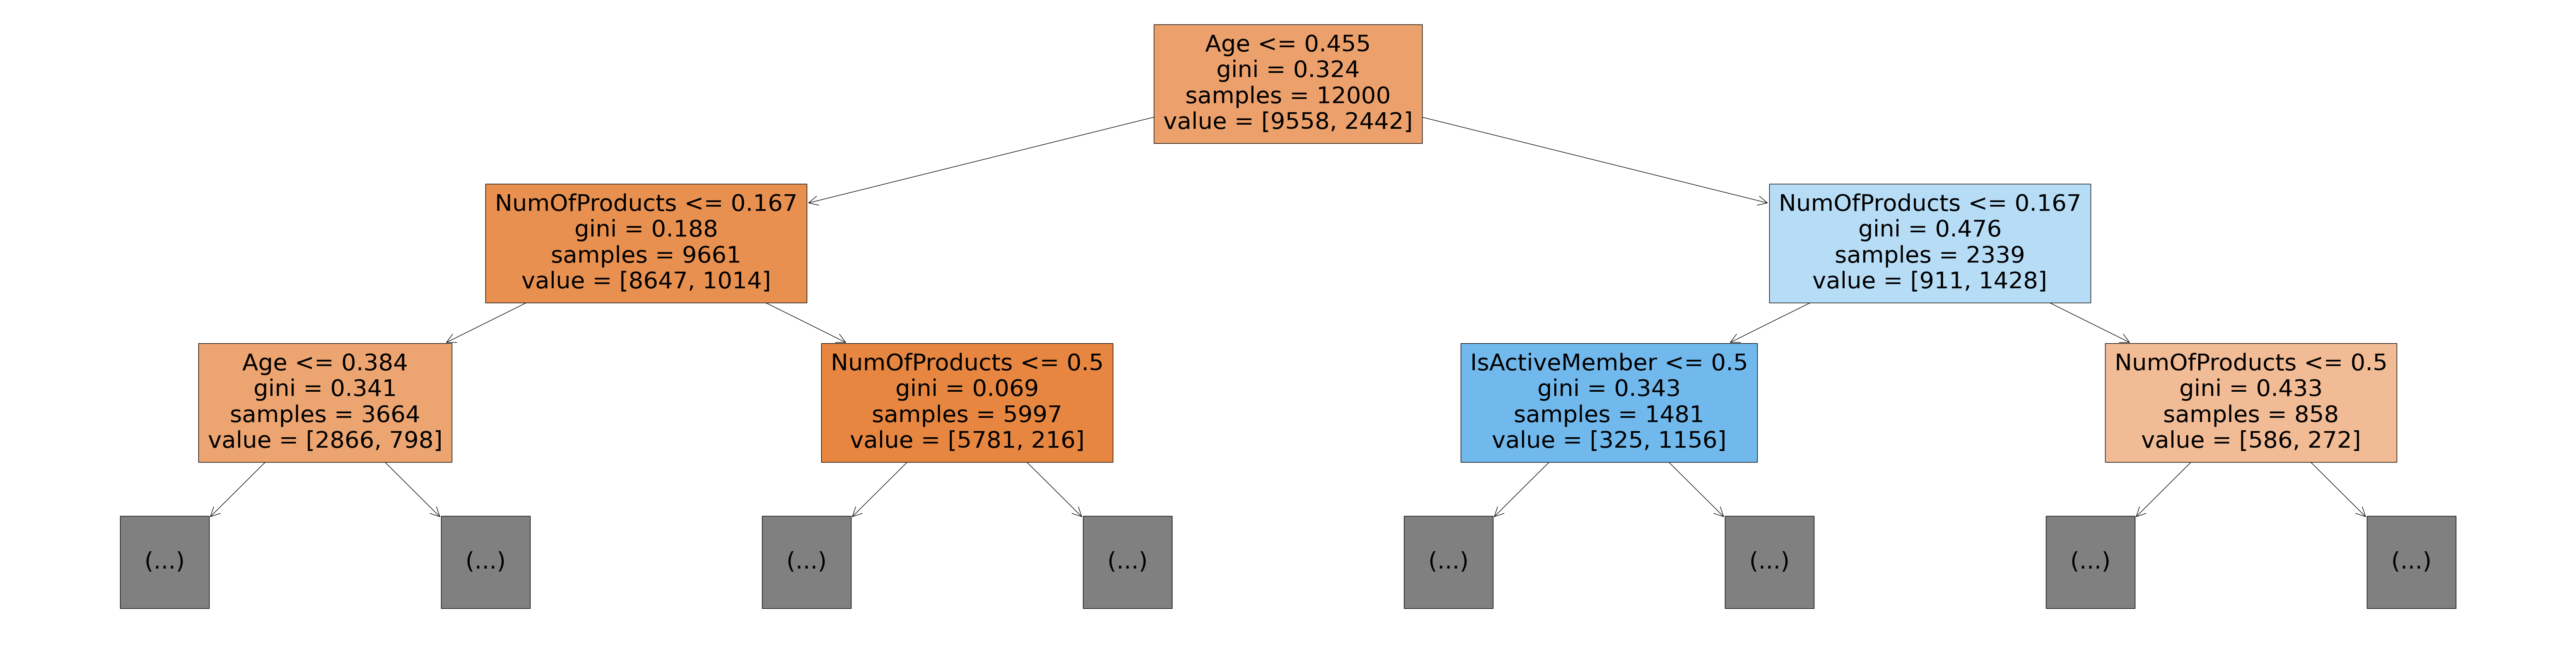

In [138]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

На глибині дерева "2" найважливішими ознаками, по яких іде далі розростання є першим Age, далі NumOfProducts і Age, NumOfProducts, IsActiveMember.

In [139]:
model.feature_importances_.round(2)

array([0.12, 0.36, 0.05, 0.08, 0.17, 0.01, 0.03, 0.12, 0.01, 0.01, 0.01,
       0.01, 0.01])

In [140]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [141]:
importance_df.head(10)

,feature,importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725
5,HasCrCard,0.012957


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [142]:
model = DecisionTreeClassifier(max_leaf_nodes= 10, max_depth=3, random_state=42)

In [143]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, random_state=42)

In [144]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.8972
AUROC for Val: 0.8911


In [145]:
model = DecisionTreeClassifier(max_leaf_nodes= 25, max_depth=10, random_state=42)

In [146]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=25, random_state=42)

In [147]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.9205
AUROC for Val: 0.9191


In [148]:
model = DecisionTreeClassifier(max_leaf_nodes= 45, max_depth=15, random_state=42)

In [149]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=45, random_state=42)

In [150]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.9304
AUROC for Val: 0.9243


In [151]:
model = DecisionTreeClassifier(max_leaf_nodes= 50, max_depth=15, random_state=42)

In [152]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=50, random_state=42)

In [153]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.9312
AUROC for Val: 0.9235


In [154]:
model = DecisionTreeClassifier(max_leaf_nodes= 35, max_depth=14, random_state=42)

In [155]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=35, random_state=42)

In [156]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.9230
AUROC for Val: 0.9184


In [157]:
model = DecisionTreeClassifier(max_leaf_nodes= 45, max_depth=16, random_state=42)

In [158]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=16, max_leaf_nodes=45, random_state=42)

In [160]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.9304
AUROC for Val: 0.9243


In [161]:
model = DecisionTreeClassifier(max_leaf_nodes= 55, max_depth=15, random_state=42)

In [162]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=55, random_state=42)

In [163]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.9319
AUROC for Val: 0.9235


In [164]:
model = DecisionTreeClassifier(max_leaf_nodes= 50, max_depth=15, random_state=42)

In [165]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=50, random_state=42)

In [166]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.9312
AUROC for Val: 0.9235


In [167]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [168]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [169]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

AUROC for Training: 0.9257
AUROC for Val: 0.9219


Найкращим результатом навмання виявився max_leaf_nodes=45, max_depth=15

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [59]:
def AUROC(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    model.fit(X_val, val_targets)

    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(train_targets, y_pred_proba_train, pos_label=1.0)
    roc_auc_train = auc(fpr, tpr)

    y_pred_proba_val = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(val_targets, y_pred_proba_val, pos_label=1.0)
    roc_auc_val = auc(fpr, tpr)

    return {'Max Depth': md, 'AUROC Training': roc_auc_train, 'AUROC Validation': roc_auc_val}

In [170]:
%%time
AUROCs = pd.DataFrame([AUROC(md) for md in range(1, 21)])

CPU times: user 1.27 s, sys: 1.93 ms, total: 1.27 s
Wall time: 1.27 s


In [171]:
AUROCs

,Max Depth,AUROC Training,AUROC Validation
0,1,0.766842,0.763633
1,2,0.851764,0.857794
2,3,0.892351,0.891798
3,4,0.909469,0.917601
4,5,0.902054,0.932867
5,6,0.885714,0.947032
6,7,0.846701,0.962192
7,8,0.837839,0.975732
8,9,0.814204,0.986307
9,10,0.804437,0.993540


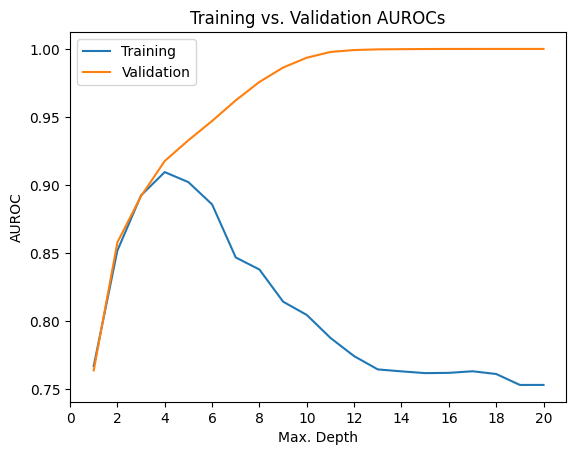

In [172]:
plt.figure()
plt.plot(AUROCs['Max Depth'], AUROCs['AUROC Training'])
plt.plot(AUROCs['Max Depth'], AUROCs['AUROC Validation'])
plt.title('Training vs. Validation AUROCs')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('AUROC')
plt.legend(['Training', 'Validation']);

Найкраща глибина = 5

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [173]:
DecisionTree = DecisionTreeClassifier(max_depth=5, random_state=42)

In [174]:
DecisionTree.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [182]:
new_data = pd.read_csv('test.csv', index_col=0)

In [196]:
from process_bank_churn import preprocess_new_data

In [211]:
test = preprocess_new_data(new_data, scaler, encoder)

In [212]:
test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,
15000,0.365155,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0
15001,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0
15002,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0
15003,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0
15004,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.496420,0.357143,1.0,0.000000,0.333333,1.0,1.0,0.248154,0.0,0.0,1.0,0.0,1.0
24996,0.589499,0.375000,0.9,0.000000,0.333333,1.0,1.0,0.712578,0.0,0.0,1.0,0.0,1.0
24997,0.818616,0.214286,0.9,0.000000,0.333333,1.0,0.0,0.024253,1.0,0.0,0.0,0.0,1.0


In [213]:
probability = DecisionTree.predict_proba(test)[:,1]
probability

array([0.23791103, 0.02761341, 0.02761341, ..., 0.00892374, 0.04173355,
       0.20459082])

In [214]:
test['Exited'] = probability
test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
id,,,,,,,,,,,,,,
15000,0.365155,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,0.237911
15001,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,0.027613
15002,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,0.027613
15003,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,0.770925
15004,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,0.027613


In [219]:
submission = pd.read_csv('sample_submission.csv')

submission[:5]

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [223]:
submission['Exited'] = test['Exited'].values

In [224]:
submission.head()

,id,Exited
0,15000,0.237911
1,15001,0.027613
2,15002,0.027613
3,15003,0.770925
4,15004,0.027613


In [226]:
submission.to_csv('submission_decision_trees_depth5.csv', index=False)

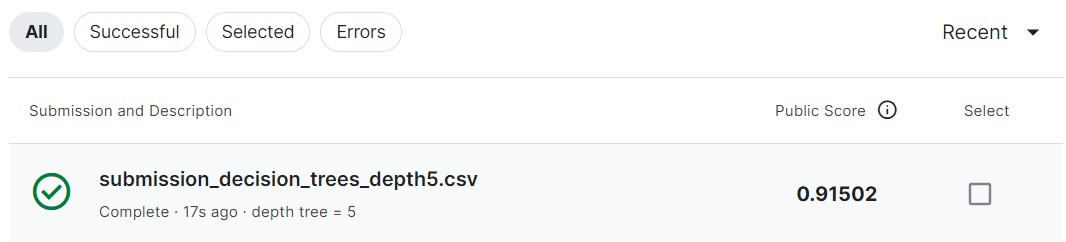